<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/PredecirPrenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
(ds_train,ds_test), info = tfds.load('fashion_mnist',split=['train','test'],as_supervised=True,with_info=True)

In [ ]:
def sep(dataset):
  ar1,ar2 = [],[]
  for id,(image,label) in enumerate(dataset):
    image = tf.cast(image,tf.float32)
    ar1.append(image)
    ar2.append(label)
  return ar1, ar2

In [ ]:
img_train,lab_train = sep(ds_train)
img_test,lab_test = sep(ds_test)

img_train,lab_train = np.array(img_train)/255.0,np.array(lab_train)
img_test,lab_test = np.array(img_test)/255.0,np.array(lab_test)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
print("Comenzando entrenamiento")
his = modelo.fit(img_train, lab_train, epochs=14, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento
Modelo entrenado


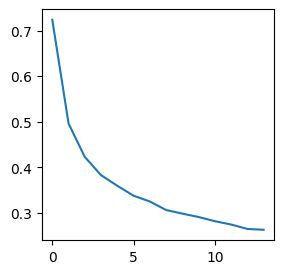

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(his.history['loss'])

In [ ]:
etiqueta = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 [==============================] - 0s 21ms/step


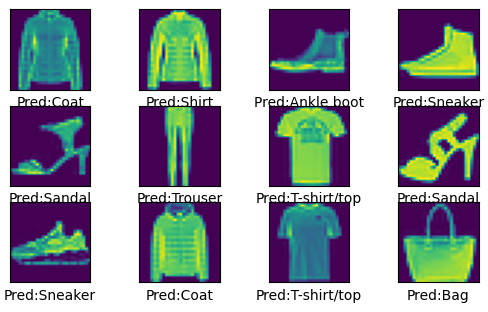

In [ ]:
pred = modelo.predict(img_test[:14])
for i in range(12):
  eleMax = np.argmax(pred[i])
  plt.subplot(4,4, i+1)
  plt.imshow(img_test[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'Pred:{etiqueta[eleMax]}')